In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configurations
%matplotlib inline
sns.set(style="whitegrid", palette="Set2")

In [3]:
df = pd.read_csv("Cardiotocographic.csv")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [6]:
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [7]:
df = df.dropna()

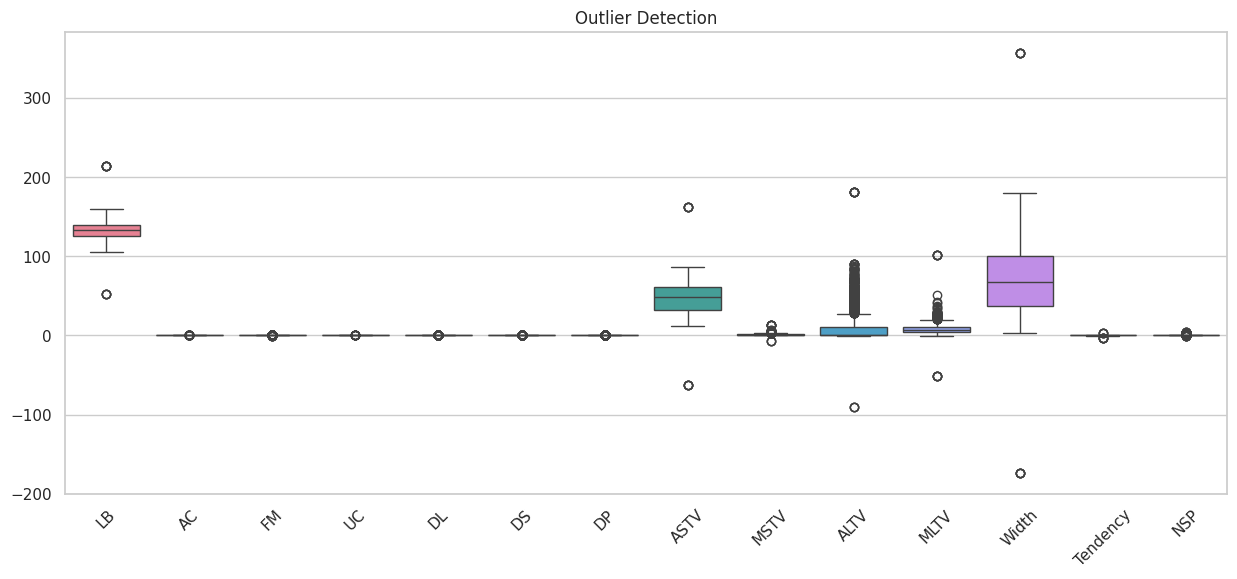

In [8]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.title("Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [9]:
desc = df.describe().T
desc["IQR"] = desc["75%"] - desc["25%"]
desc[["mean", "50%", "std", "IQR"]]

,mean,50%,std,IQR
LB,133.343598,133.000000,11.270154,14.000000
AC,0.003202,0.001631,0.004324,0.005650
FM,0.009963,0.000000,0.067870,0.002554
UC,0.004388,0.004484,0.003350,0.004698
DL,0.001892,0.000000,0.003348,0.003289
DS,0.000003,0.000000,0.000142,0.000000
DP,0.000175,0.000000,0.000840,0.000000
ASTV,46.996929,49.000000,18.847737,29.000000
MSTV,1.361006,1.200000,1.173164,1.000000
ALTV,10.353647,0.000000,21.282102,11.000000


In [10]:
desc[desc["std"] > desc["std"].mean()]

,count,mean,std,min,25%,50%,75%,max,IQR
LB,2105.0,133.343598,11.270154,51.842487,126.0,133.0,140.0,214.0,14.0
ASTV,2105.0,46.996929,18.847737,-63.000000,32.0,49.0,61.0,162.0,29.0
ALTV,2105.0,10.353647,21.282102,-91.000000,0.0,0.0,11.0,182.0,11.0
MLTV,2105.0,8.284887,7.772858,-50.700000,4.6,7.4,10.9,101.4,6.3
Width,2105.0,70.429260,42.931822,-174.000000,37.0,67.0,100.0,357.0,63.0


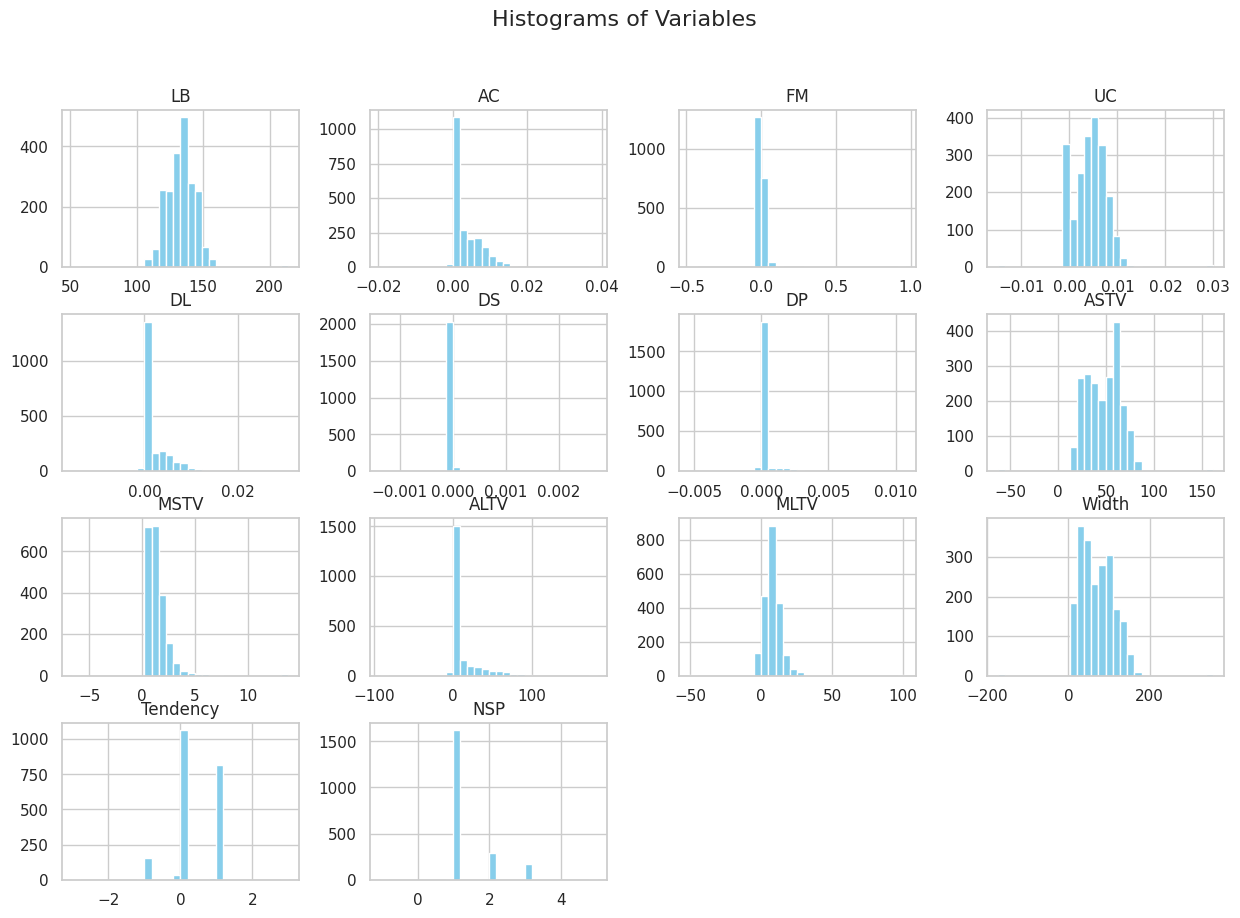

In [11]:
df.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle("Histograms of Variables", fontsize=16)
plt.show()

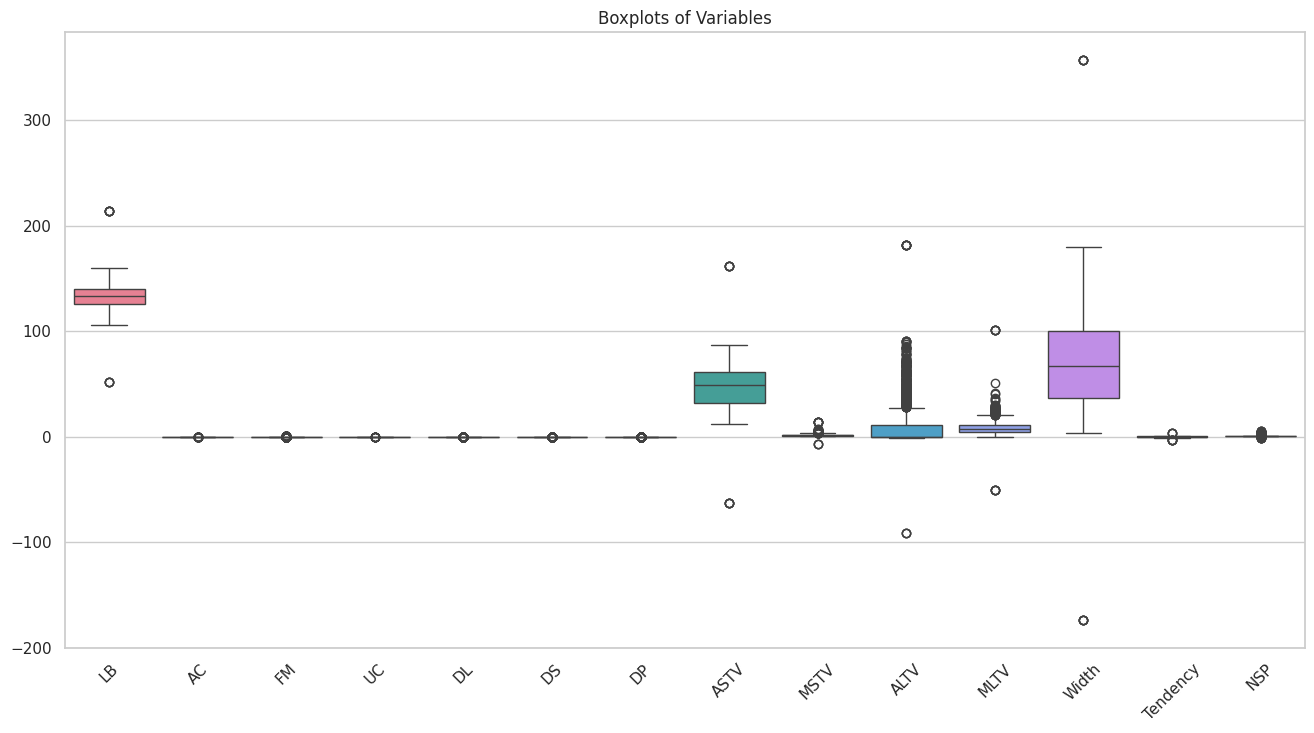

In [12]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)
plt.title("Boxplots of Variables")
plt.xticks(rotation=45)
plt.show()

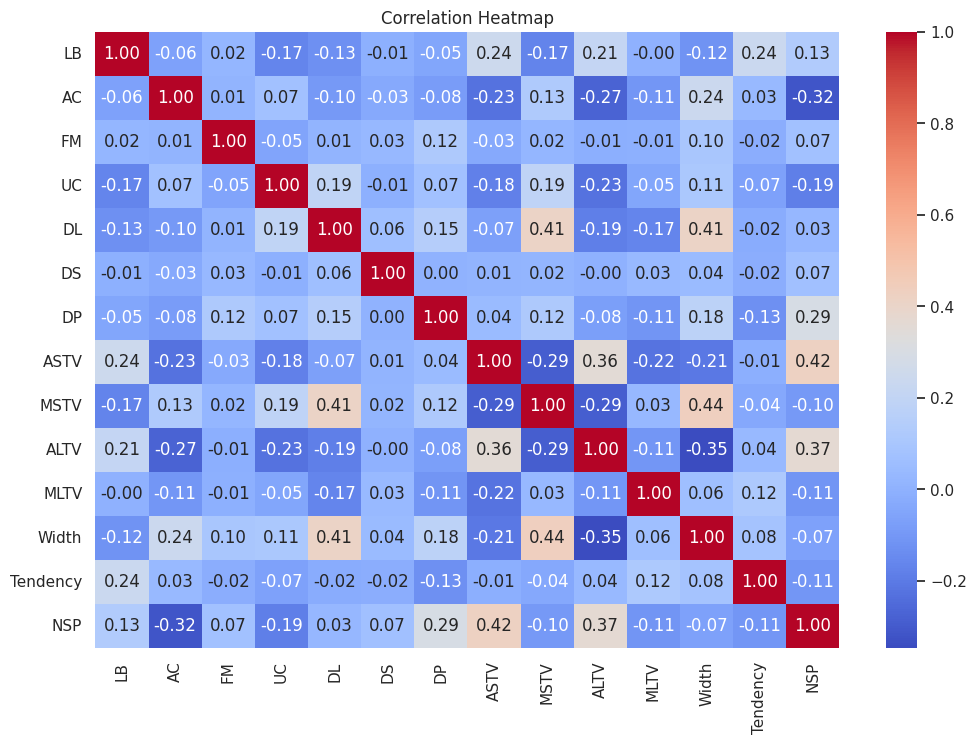

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

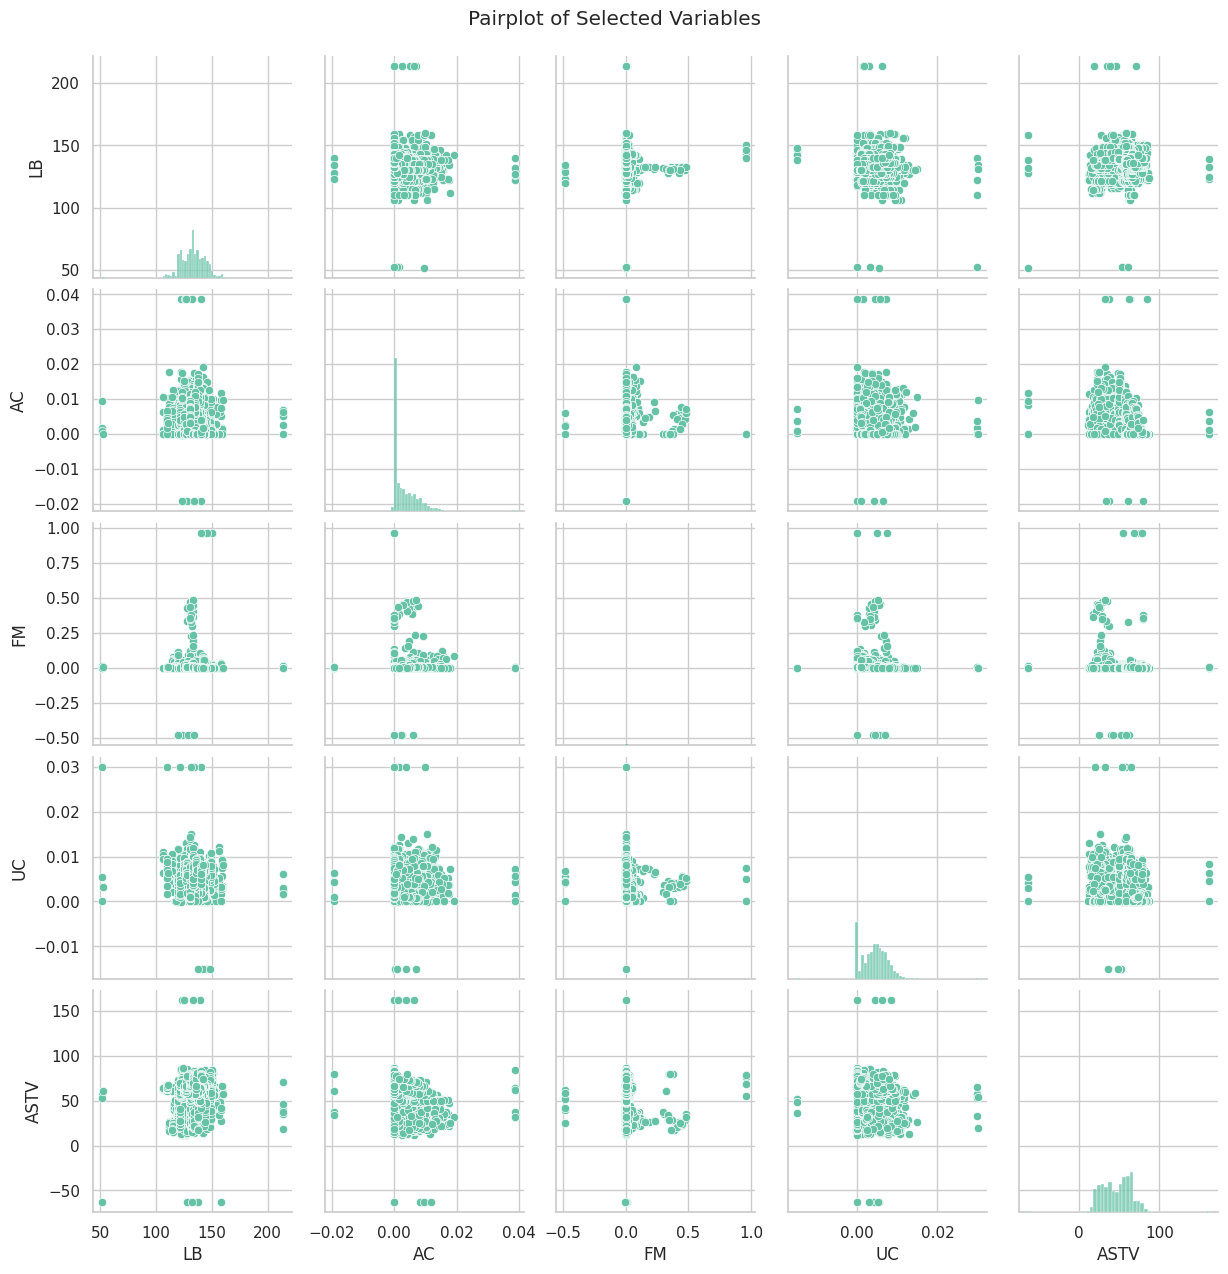

In [14]:
selected_cols = ['LB', 'AC', 'FM', 'UC', 'ASTV']
sns.pairplot(df[selected_cols])
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()

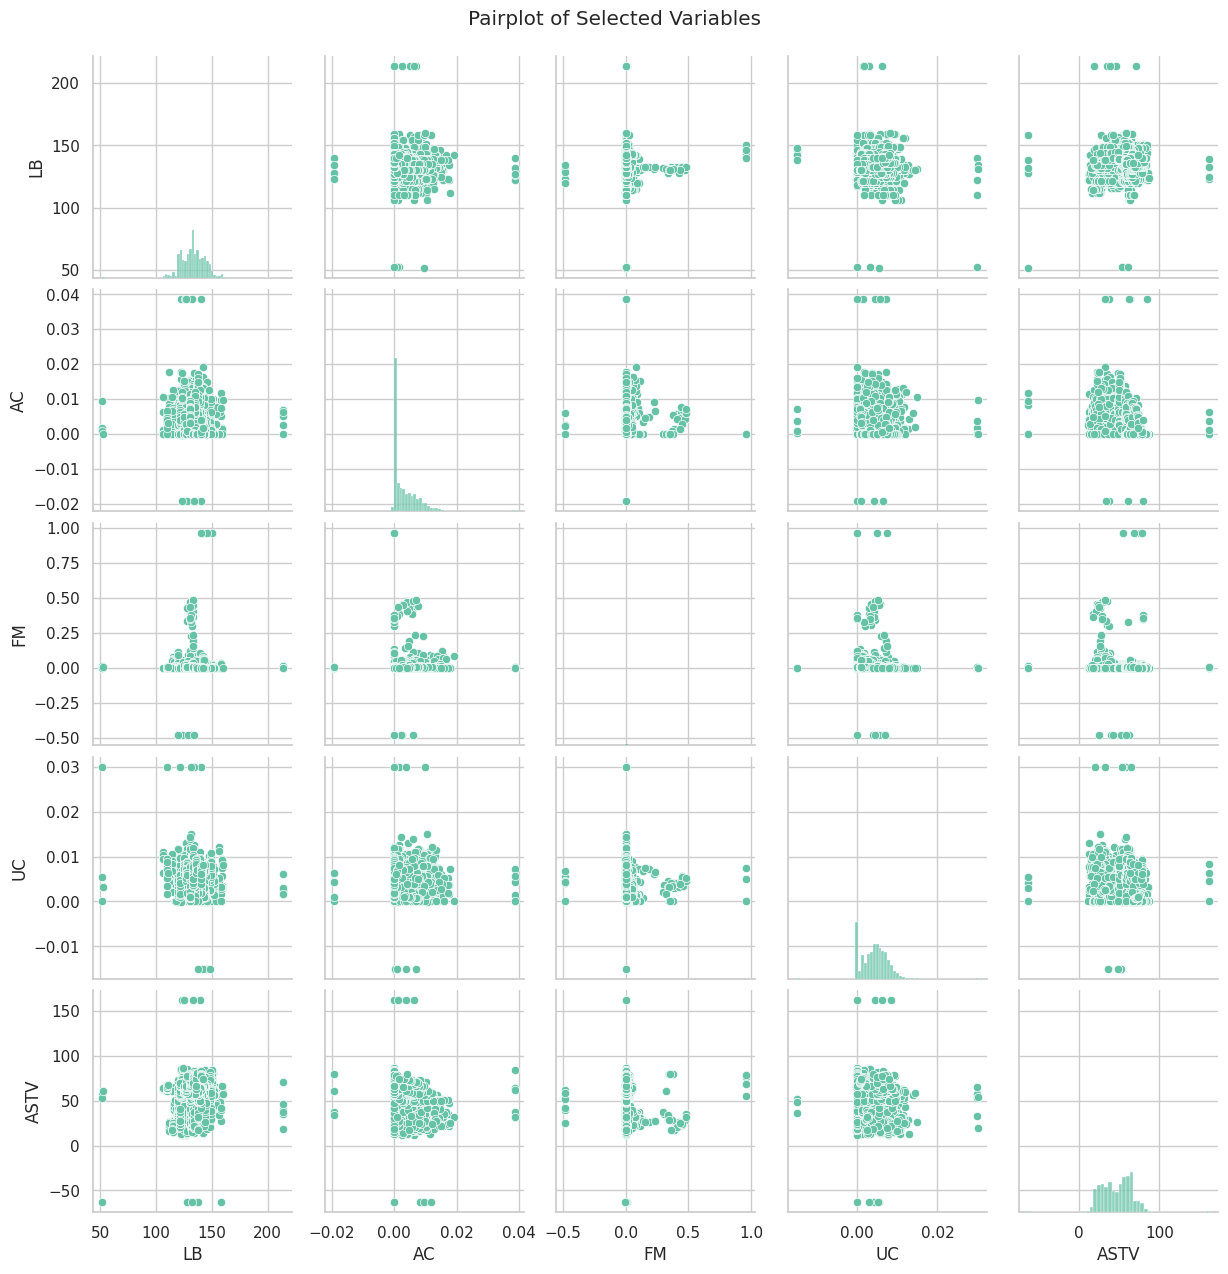

In [15]:
selected_cols = ['LB', 'AC', 'FM', 'UC', 'ASTV']
sns.pairplot(df[selected_cols])
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()

In [17]:
# Correlation matrix
corr_matrix = df.corr().round(2)
high_corr = corr_matrix[(corr_matrix > 0.6) & (corr_matrix != 1.0)]
print("High Correlation Pairs:")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))

High Correlation Pairs:
Empty DataFrame
Columns: []
Index: []


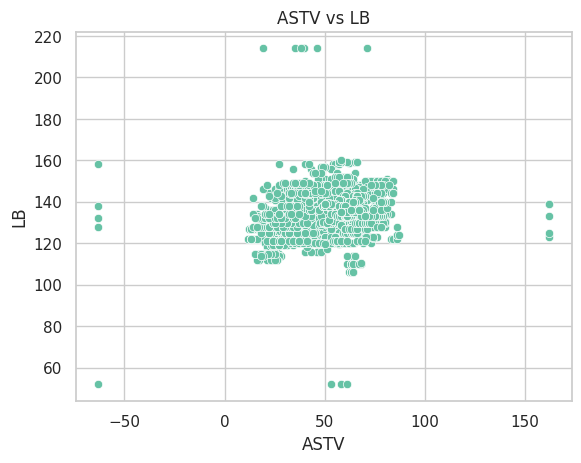

In [18]:
sns.scatterplot(x='ASTV', y='LB', data=df)
plt.title("ASTV vs LB")
plt.show()

In [19]:
conclusions = {
    "1. Central Trends": "Most variables are centered in expected ranges; LB shows strong central tendency.",
    "2. Variability": "ASTV and ALTV have high variability, may indicate important FHR changes.",
    "3. Correlations": "LB and ASTV are moderately correlated, suggesting possible linkage between baseline and variability.",
    "4. Outliers": "Detected in FM and UC; consider filtering or capping in modeling.",
    "5. Visualization Insights": "Violin plots highlight skewness in variables like FM and AC."
}
for k, v in conclusions.items():
    print(f"{k}: {v}")

1. Central Trends: Most variables are centered in expected ranges; LB shows strong central tendency.
2. Variability: ASTV and ALTV have high variability, may indicate important FHR changes.
3. Correlations: LB and ASTV are moderately correlated, suggesting possible linkage between baseline and variability.
4. Outliers: Detected in FM and UC; consider filtering or capping in modeling.
5. Visualization Insights: Violin plots highlight skewness in variables like FM and AC.
